### Import the necessary libraries

In [1]:
import numpy as np          # mathematical computation
# numpy is aliased as np
import pandas as pd             # Data Preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt      # Data visualization
# pyplot is aliased as plt        
import seaborn as sns                # Data visualization
# seaborn is aliased as sns
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df=pd.read_csv('CAR DETAILS.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Inspecting the first 5 rows of dataset

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Shape of Dataset

In [4]:
df.shape
# rows=4340, columns=8

(4340, 8)

### Print the concise summary of data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Data Preprocessing

#### 1)Handling the null values

In [6]:
df_null=df.isnull().sum()
df_null=df_null[df_null>0]
df_null

Series([], dtype: int64)

#### Inference:
There are no null values in any columns.

#### 2) Handling duplicate records present in Dataset

In [7]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [8]:
df.duplicated().sum()

763

### Inference:- 
- There are 763 duplicated records in the Car dataset.

#### Drop the duplicate records

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(3577, 8)

In [11]:
df.duplicated().sum()          
# duplicate records present in the data after dropping the duplicate records from data= 0

0

#### 3) Checking the datatypes

In [12]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

### EDA

#### 1) plot value counts of name that has greater than value counts.

In [13]:
name=df['name'].value_counts()
name=name[name>=10]

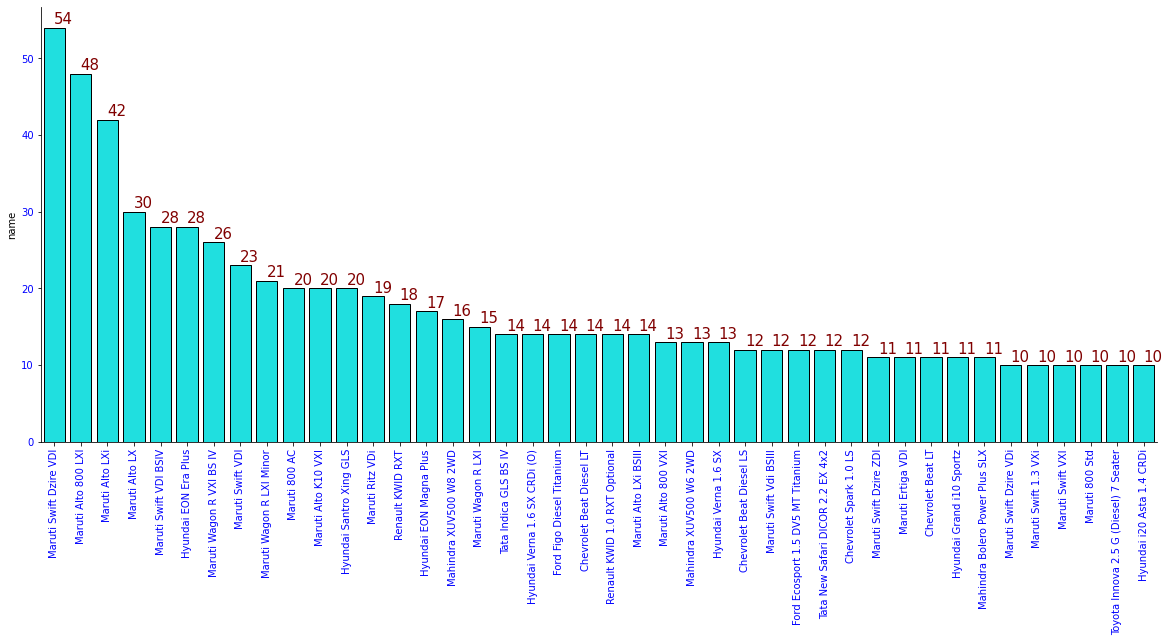

In [14]:
plt.figure(figsize=(20, 8))
sns.barplot(name.index, name, color='cyan', edgecolor='black', order=name.sort_values(ascending=False).index)
plt.xticks(rotation=90, size=10, c='blue')
plt.yticks(size=10, c='blue')
for i in range(len(name)):
    plt.annotate(text=name[i], xy=(i, name[i]+0.5), color='maroon', size=15)
sns.despine()
plt.show()

#### 2) find year wise mean of selling price and depict it on bar chart  

In [15]:
ms_year=df.groupby('year')['selling_price'].mean().reset_index()
ms_year

,year,selling_price
0,1992,50000.000000
1,1995,95000.000000
2,1996,225000.000000
3,1997,93000.000000
4,1998,165111.111111
5,1999,73888.888889
6,2000,81500.000000
7,2001,109562.437500
8,2002,86111.111111
9,2003,87090.909091


Text(0, 0.5, 'Average Selling Price of the car')

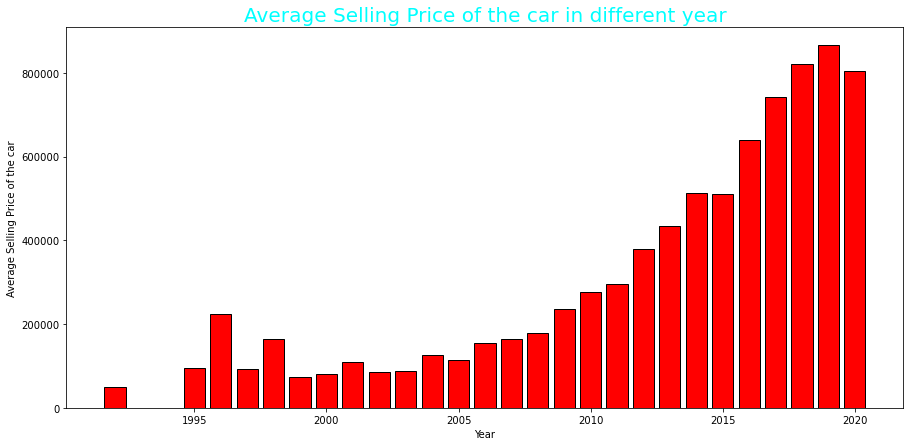

In [16]:
plt.figure(figsize=(15, 7))
plt.bar(ms_year['year'], ms_year['selling_price'], color='red', edgecolor='black')
plt.title('Average Selling Price of the car in different year', c='cyan', size=20)
plt.xlabel('Year')
plt.ylabel('Average Selling Price of the car')

#### 2) depict the value counts of fuel on bar chart 

In [17]:
df['fuel'].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

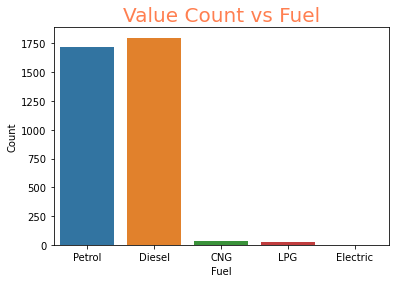

In [18]:
sns.countplot(df['fuel'])
plt.title('Value Count vs Fuel', c='coral', size=20)
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.show()

#### 3) find value counts of owner and depict it on bar chart

In [19]:
df['owner'].value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

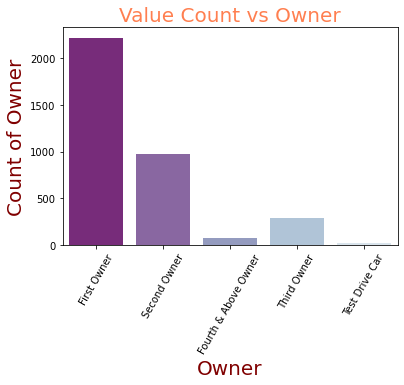

In [20]:
sns.countplot(df['owner'], palette='BuPu_r')
plt.title('Value Count vs Owner', color='coral', size=20)
plt.xlabel('Owner', c='maroon', size=20)
plt.ylabel('Count', c='maroon', size=20)
plt.ylabel('Count of Owner')
plt.xticks(rotation=60)
plt.show()

#### 4) find seller type wise mean of selling price and depict in pie chart 

In [21]:
ms_seller_type=df.groupby('seller_type')['selling_price'].mean().reset_index()
ms_seller_type

,seller_type,selling_price
0,Dealer,652699.390449
1,Individual,424904.024364
2,Trustmark Dealer,822272.727273


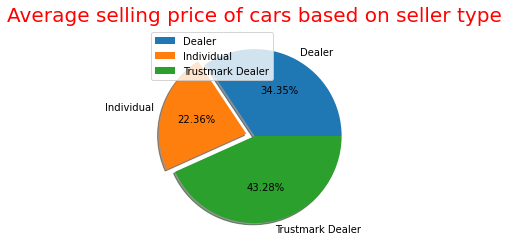

In [22]:
plt.pie(data=ms_seller_type, x='selling_price', labels='seller_type', autopct='%.002f%%', shadow=True, explode=(0, 0.1, 0),
       radius=1)
plt.title('Average selling price of cars based on seller type', c='red', size=20)
plt.legend(loc=2)
plt.show()

#### 5) For the year between 2001 to 2010, find the sum and mean of selling price of cars based on fuel and depict it on bar chart

In [23]:
y=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
ms_year_fuel=df[df['year'].isin(y)].groupby('fuel')['selling_price'].agg(['sum', 'mean']).reset_index()
ms_year_fuel

,fuel,sum,mean
0,CNG,425000,106250.000000
1,Diesel,51491988,258753.708543
2,Electric,310000,310000.000000
3,LPG,675000,96428.571429
4,Petrol,58772803,134800.006881


<Figure size 1080x1440 with 0 Axes>

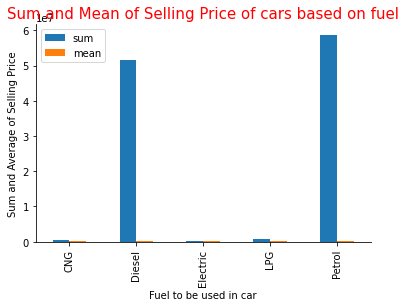

In [24]:
plt.figure(figsize=(15, 20))
ms_year_fuel.plot.bar(x='fuel')
plt.title('Sum and Mean of Selling Price of cars based on fuel', color='red', size=15)
plt.xlabel('Fuel to be used in car')
plt.ylabel('Sum and Average of Selling Price')
sns.despine()
plt.show()

### Correlation

<AxesSubplot:>

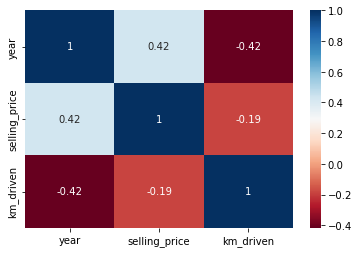

In [25]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='RdBu')

In [26]:
Brand_Name=[]
for i in df['name'].tolist():
    Brand_Name.append(i.split()[0])
print(Brand_Name)

['Maruti', 'Maruti', 'Hyundai', 'Datsun', 'Honda', 'Maruti', 'Hyundai', 'Tata', 'Hyundai', 'Maruti', 'Chevrolet', 'Tata', 'Toyota', 'Maruti', 'Hyundai', 'Chevrolet', 'Jaguar', 'Mercedes-Benz', 'Maruti', 'Audi', 'Honda', 'Tata', 'Audi', 'Mercedes-Benz', 'Skoda', 'Toyota', 'Toyota', 'Jeep', 'Mercedes-Benz', 'Hyundai', 'BMW', 'Audi', 'Hyundai', 'Mahindra', 'Honda', 'Maruti', 'Maruti', 'Mahindra', 'Hyundai', 'Hyundai', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Mahindra', 'Honda', 'Maruti', 'Tata', 'Hyundai', 'Toyota', 'Maruti', 'Maruti', 'Chevrolet', 'Toyota', 'Mahindra', 'Hyundai', 'Tata', 'Toyota', 'Tata', 'Maruti', 'Ford', 'Maruti', 'Honda', 'Hyundai', 'Skoda', 'Hyundai', 'Nissan', 'Hyundai', 'Hyundai', 'Honda', 'Honda', 'Hyundai', 'Mercedes-Benz', 'Mahindra', 'Renault', 'Hyundai', 'Mahindra', 'Audi', 'Fiat', 'Audi', 'Datsun', 'Volkswagen', 'Audi', 'Honda', 'Mercedes-Benz', 'BMW', 'Volvo', 'Maruti', 'BMW', 'Mahindra', 'Hyundai', 'Nissan', 'Mahind

In [27]:
a=np.array(Brand_Name)
a

array(['Maruti', 'Maruti', 'Hyundai', ..., 'Maruti', 'Hyundai', 'Renault'],
      dtype='<U13')

In [28]:
df['Brand_Name']=a

In [29]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_Name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


### Selecting the dependent and independent variables

In [30]:
X=df.drop(['name', 'selling_price'], axis=1)
y=df['selling_price']

In [31]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3577, 7)
(3577,)


### Extracting the categorical columns and numerical columns

In [32]:
cat_cols=X.select_dtypes(include='object')
num_cols=X.select_dtypes(exclude='object')

In [33]:
print(cat_cols.columns)

Index(['fuel', 'seller_type', 'transmission', 'owner', 'Brand_Name'], dtype='object')


In [34]:
print(num_cols.columns)

Index(['year', 'km_driven'], dtype='object')


### Encoding the categorical dataset

In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [36]:
for i in cat_cols:
    X[i]=lb.fit_transform(X[i])

In [37]:
X

,year,km_driven,fuel,seller_type,transmission,owner,Brand_Name
0,2007,70000,4,1,1,0,18
1,2007,50000,4,1,1,0,18
2,2012,100000,1,1,1,0,10
3,2017,46000,4,1,1,0,5
4,2014,141000,1,1,1,2,9
...,...,...,...,...,...,...,...
4335,2014,80000,1,1,1,2,10
4336,2014,80000,1,1,1,2,10
4337,2009,83000,4,1,1,2,18
4338,2016,90000,1,1,1,0,10


### Split the data into training and test data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=0)

In [39]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Shape of Training and test dataset 

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3219, 7)
(358, 7)
(3219,)
(358,)


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Generating a regression evaluation metrices function to evaluate model and also generate a function to calculate the score of model

In [42]:
def reg_eval_met(ytest, ypred):
    mse=mean_squared_error(ytest, ypred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(ytest, ypred)
    r2s=r2_score(ytest, ypred)
    print("mean squared error :", mse)
    print("Root mean squared error :", rmse)
    print("mean absolute error :", mae)
    print('R2 Score :', r2s)
    
def mscore(model):
    print("Training Score :", model.score(X_train, y_train))
    print("Testing Score :", model.score(X_test, y_test))


### Generate Regressor model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
lr_car=LinearRegression()
la_car=Lasso(alpha=0.1)
ri_car=Ridge(alpha=10)
dt_car=DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_split=15, random_state=0)
rf_car=RandomForestRegressor(n_estimators=110, criterion='mse', max_depth=11, min_samples_split=15, random_state=0)

#### 1) Linear Regressor

#### Train the model 

In [45]:
lr_car.fit(X_train, y_train)

LinearRegression()

#### Predict on test data

In [46]:
ypred_lr=lr_car.predict(X_test)
ypred_lr

array([ 150989.25051215,  430445.49852952,  770203.25709188,
        439033.27588765,  536350.68622994,  574666.28158283,
        354343.96647418,  281970.36492586,  671823.84383473,
       -111813.43083675,  703684.37468405,  436418.82004505,
        450234.43698414,  804459.84522521,  156485.46498705,
        370808.33236997, 1297193.47997068,   85704.32445478,
       1148703.78746213,  -82169.499285  ,  497154.57803699,
        164446.31493443,  627816.26736616,  533555.7723216 ,
        513050.958858  ,  441499.79716823,   96326.43155344,
        230685.6916759 ,  420684.73393568,   85704.32445478,
        587773.176818  ,  106537.53054614,  793059.18618724,
       1540104.77039006,  474459.99554613,  541676.53476524,
       1346552.87462358,  252346.3458433 ,  317023.24341068,
        569441.78139791,  495951.36578913,  644437.19012576,
        688660.2369089 ,  211372.00830688,  721309.99708194,
        436233.33056989,  423666.40877281,  157865.7926309 ,
        103902.46472818,

#### Model Evaluation

In [47]:
reg_eval_met(y_test, ypred_lr)

mean squared error : 109357350192.73291
Root mean squared error : 330692.22880608024
mean absolute error : 203345.35948067304
R2 Score : 0.410645994992731


In [48]:
mscore(lr_car)

Training Score : 0.42989300208216696
Testing Score : 0.410645994992731


#### 2) Lasso Regressor

#### Trian the model

In [49]:
la_car.fit(X_train, y_train)

Lasso(alpha=0.1)

#### Predict on test data

In [50]:
ypred_la=la_car.predict(X_test)
ypred_la

array([ 150989.4121483 ,  430445.54824722,  770202.97648551,
        439033.31215297,  536350.90839277,  574666.50980926,
        354344.21682966,  281970.61849909,  671824.03593765,
       -111813.1699695 ,  703684.04181036,  436418.58183743,
        450234.71517102,  804458.86769645,  156485.63196747,
        370808.58736533, 1297192.06028177,   85704.48170203,
       1148702.31894612,  -82169.4553483 ,  497155.01179005,
        164446.55692926,  627816.39487536,  533555.98342004,
        513051.11986907,  441499.90222648,   96326.61461493,
        230685.99922965,  420685.01458256,   85704.48170203,
        587773.2996065 ,  106537.68015222,  793059.42137572,
       1540103.81741655,  474459.7725253 ,  541676.6511202 ,
       1346552.43345641,  252346.66715553,  317023.24824984,
        569441.96742006,  495951.53927942,  644437.44258884,
        688659.92166254,  211372.21624383,  721310.30353326,
        436233.10052863,  423666.6912756 ,  157866.05733323,
        103902.8252909 ,

#### Model Evaluation

In [51]:
reg_eval_met(y_test, ypred_la)

mean squared error : 109357293893.71657
Root mean squared error : 330692.14368308865
mean absolute error : 203345.30100922406
R2 Score : 0.4106462984021563


In [52]:
mscore(la_car)

Training Score : 0.42989300208151116
Testing Score : 0.4106462984021563


#### 3) Ridge Regressor

#### Trian the model

In [53]:
ri_car.fit(X_train, y_train)

Ridge(alpha=10)

#### Predict on test data

In [54]:
ypred_ri=ri_car.predict(X_test)
ypred_ri

array([ 152563.2664668 ,  431768.1193516 ,  775531.65963843,
        440212.33450125,  539577.6027365 ,  577614.70464645,
        357151.35034786,  283998.03525171,  675725.02299815,
       -110744.35120666,  707955.19019292,  440455.11075175,
        453464.10864177,  775507.59958205,  158126.33281103,
        374119.64603454, 1270624.71762726,   86723.01161171,
       1121762.32665271,  -82191.36537336,  501901.624091  ,
        165779.29367484,  630934.15351412,  536307.34394914,
        514863.75799461,  443333.78617194,   97217.03156358,
        233790.05089176,  424299.52083746,   86723.01161171,
        590403.52534139,  108315.40468293,  797194.41099952,
       1514126.3956254 ,  478710.97329627,  543966.38957255,
       1318273.83411391,  255327.98824325,  317710.33284645,
        573420.7436451 ,  498190.37665187,  647738.21957946,
        693548.01454861,  213928.97603841,  725353.20139605,
        440708.71474318,  427262.29384919,  159752.92925884,
        106300.09577914,

#### Model Evaluation

In [55]:
reg_eval_met(y_test, ypred_ri)

mean squared error : 108360463063.33136
Root mean squared error : 329181.5047406694
mean absolute error : 202748.7486822308
R2 Score : 0.4160184680932365


In [56]:
mscore(ri_car)

Training Score : 0.4296187882150794
Testing Score : 0.4160184680932365


#### 4) DecisionTreeRegressor

#### Train the model

In [57]:
dt_car.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_split=15,
                      random_state=0)

#### Predict on test data

In [58]:
ypred_dt=dt_car.predict(X_test)
ypred_dt

array([ 200634.61538462,  160666.66666667,  860999.84210526,
        232558.11627907,  501975.84337349,  444266.62666667,
        340749.9       ,   68571.42857143,  750416.61111111,
        136250.        ,  485714.14285714,  340749.9       ,
        430077.55172414, 2800000.        ,  200634.61538462,
        424232.51162791,  506071.42857143,  164075.68181818,
       2050000.        ,   88884.93939394,  352499.875     ,
        200000.        ,  603045.45454545,  567155.53333333,
        323928.57142857,  333259.96      ,  218475.63106796,
        147000.        ,  424232.51162791,  164075.68181818,
        444266.62666667,  235624.875     ,  890941.17647059,
       3138846.15384615,  340749.9       ,  411049.95      ,
       1753636.27272727,  218475.63106796,  117000.        ,
        313750.        ,  444266.62666667,  719193.48387097,
        501975.84337349,  322727.09090909,  879555.51388889,
        492227.22727273,  424232.51162791,  200634.61538462,
        200634.61538462,

#### Model Evaluation

In [59]:
reg_eval_met(y_test, ypred_dt)

mean squared error : 81679613389.16881
Root mean squared error : 285796.4544727048
mean absolute error : 157931.02065963487
R2 Score : 0.559808214139127


In [60]:
mscore(dt_car)

Training Score : 0.7509307152306935
Testing Score : 0.559808214139127


#### 5) RandomForestRegressor

#### Train the model 

In [61]:
rf_car.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=11, min_samples_split=15,
                      n_estimators=110, random_state=0)

#### Predict on test data

In [62]:
ypred_rf=rf_car.predict(X_test)
ypred_rf

array([ 179435.8510476 ,  181779.33719315,  829796.35181169,
        241211.43406603,  522992.81478591,  465950.76133771,
        305769.97007215,  106546.80141105,  678098.96304998,
        127668.15451537,  625594.15056341,  368726.82473616,
        406858.79784229, 1476093.04128692,  174270.13764714,
        378483.37588999,  560025.44174506,  151297.80461172,
        860427.31050747,   92844.88783381,  351178.29360362,
         94412.46277843,  594981.81192539,  594859.9118242 ,
        359287.32323615,  376237.39556948,  206587.10898128,
        181579.34432565,  460404.04904536,  151297.80461172,
        467851.68180957,  170305.16948291,  871291.12340299,
       3056647.61197988,  390785.80729956,  437817.22647041,
       1535192.81540817,  243545.72051615,  120266.57144234,
        307328.40067259,  435993.64059848,  734637.69137482,
        523544.75544635,  293045.6283169 ,  911993.63230644,
        456799.74570433,  446858.81767966,  189388.88087148,
        200699.23446472,

#### Model Evaluation

In [63]:
reg_eval_met(y_test, ypred_rf)

mean squared error : 61040488303.55244
Root mean squared error : 247063.73328263385
mean absolute error : 146148.96183504784
R2 Score : 0.6710376011681327


In [64]:
mscore(rf_car)

Training Score : 0.7620588747832713
Testing Score : 0.6710376011681327


#### Inference:-
RandomForestRegressor Model would be the best model for predicting seller price of car.

#### Saving the model and the DataFrame and Independent features

In [65]:
import pickle

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_Name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [67]:
pickle.dump(rf_car, open('rf.pkl', 'wb'))     # Saving the best performing model
pickle.dump(df, open('data1.pkl', 'wb'))      # Saving the dataframe
pickle.dump(X, open('Independent_features.pkl', 'wb'))    # Saving the dataframe Independent features